In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [4]:
from metclient.frost import auth
from metclient.geo_locations import GeoLocation

In [5]:
session = auth.Session(config_file='../config/config.ini')
poly = GeoLocation(place_id=198727066) # Oslo municipality

In [6]:
params = {
    "referencetime": "latest",
    "maxage": "P10Y",
    "geometry": poly.get_simplified_wkt(max_char_size=1800)
}

In [7]:
df = session.get_data_frame(type='lightning', dict_params=params)

In [11]:
df.head()

,version,year,month,day,hour,minutes,seconds,nanoseconds,latitude,longitude,...,semiMajorAxis,semiMinorAxis,chiSquareValue,riseTime,peakToZeroTime,maxRateOfRise,cloudIndicator,angleIndicator,signalIndicator,timingIndicator
0,0,2019,9,1,4,15,44,86889216,59.9961,10.6738,...,0.40,0.4,0.97,8.1,30.4,-0.0,0,1,0,1
1,0,2019,9,1,4,15,44,86878976,59.9993,10.5829,...,0.49,0.4,0.76,21.4,4.4,0.7,1,1,0,1
2,0,2019,9,1,4,15,43,201830656,59.8879,10.7333,...,2.16,0.4,0.53,9.9,44.8,0.4,1,1,0,1
3,0,2019,9,1,4,15,43,200306432,59.8881,10.7739,...,0.40,0.4,2.92,12.5,9.9,2.1,0,1,0,1
4,0,2019,9,1,4,15,43,605063936,60.0135,10.8106,...,0.40,0.4,4.80,2.2,21.6,-4.3,0,1,0,1


In [54]:
df.groupby(["year", "month"]).size().sort_index().iplot(kind='bar')

In [55]:
df["year"].value_counts().sort_index().iplot(kind='bar')

In [45]:
df.columns

Index(['version', 'year', 'month', 'day', 'hour', 'minutes', 'seconds',
       'nanoseconds', 'latitude', 'longitude', 'peakCurrent', 'multiplicity',
       'numSensors', 'degreesOfFreedom', 'ellipseAngle', 'semiMajorAxis',
       'semiMinorAxis', 'chiSquareValue', 'riseTime', 'peakToZeroTime',
       'maxRateOfRise', 'cloudIndicator', 'angleIndicator', 'signalIndicator',
       'timingIndicator'],
      dtype='object')

In [56]:
df["numSensors"].iplot(kind='hist')

In [33]:
df.groupby([i for i in df.columns if "Indicator" in i]).size().reset_index(name='count')

,cloudIndicator,angleIndicator,signalIndicator,timingIndicator,count
0,0,0,0,0,55
1,0,1,0,0,3
2,0,1,0,1,2787
3,1,0,0,0,21
4,1,1,0,1,1924


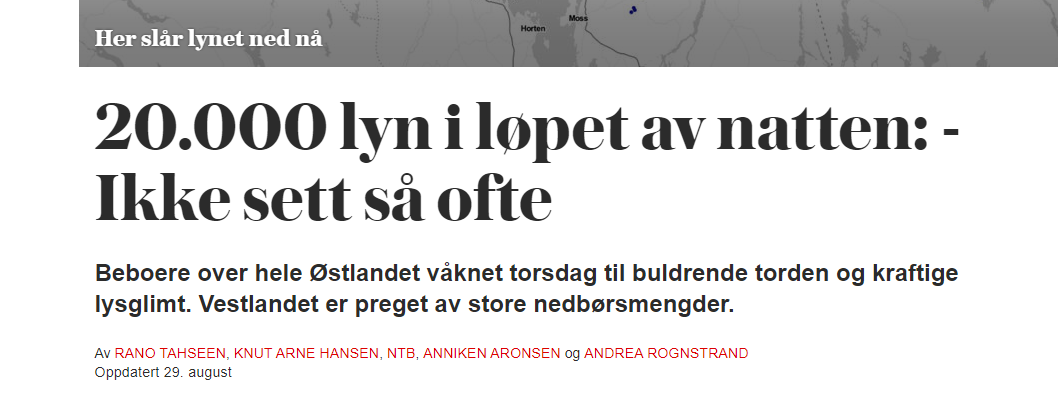